In [2]:
#problem 1
#by adding additional meaningful features we can make our model more complex
#so it improves accuracy of the model
#make dimention high.

#by train more and more datas, we can make our model better

In [ ]:
# house price

In [3]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from sklearn import datasets
boston = datasets.load_boston()

In [5]:
X = boston.data
Y = boston.target

print "Features\n", boston.feature_names
print 
print "Features: \n", X[0]
print "Target: \n", Y[0]

Features
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

Features: 
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
Target: 
24.0


In [6]:
import numpy as np

numData = len(X)
num_remain = numData - numData/10*10
num_choose = numData/10*8 + num_remain # number of choose Data
num_else = numData - num_choose

num_features = len(boston.feature_names)

def choose_data(data, xORy):
    #result = data[0:num_choose]
    if(xORy == 0):
        result = np.zeros( (num_choose, num_features) )
    else:
        result = np.zeros( (num_choose) )
    
    for i in range(numData/10):
        result[i*8:(i*8+8)] = data[i*10:(i*10)+8]
    
    result[num_choose-num_remain:num_choose] = data[numData/10*10:numData]
    
    
    return result

def else_data(data, xORy):
    #result = data[0:num_else]
    if(xORy == 0):
        result = np.zeros( (num_else, num_features) )
    else:
        result = np.zeros( (num_else) )
    
    for i in range(numData/10):
        result[i*2:(i*2)+2] = data[i*10+8:(i*10)+10]
    
    return result
    
    

x_train = choose_data(X,0)
x_test  = else_data(X,0)
y_train = choose_data(Y,1)
y_test  = else_data(Y,1)


print "\n", x_train
print "\n", x_test
print "\n", y_train
print "\n", y_test

print "\n", X[num_choose-1]


[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]

[[  2.11240000e-01   1.25000000e+01   7.87000000e+00 ...,   1.52000000e+01
    3.86630000e+02   2.99300000e+01]
 [  1.70040000e-01   1.25000000e+01   7.87000000e+00 ...,   1.52000000e+01
    3.86710000e+02   1.71000000e+01]
 [  8.02710000e-01   0.00000000e+00   8.14000000e+00 ...,   2.10000000e+01
    2.88990000e+02 

In [7]:
def plot_2D_lr(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)        
    
    plt.show()

In [8]:
def get_one_features(x_data, numFeat):
    one_data = []
    for i in range(len(x_data)):
        one_data.append(x_data[i][numFeat])
    return one_data

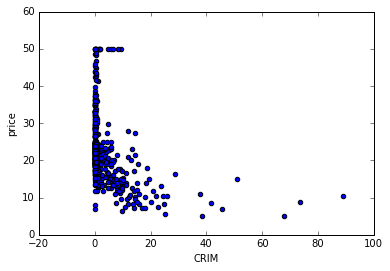

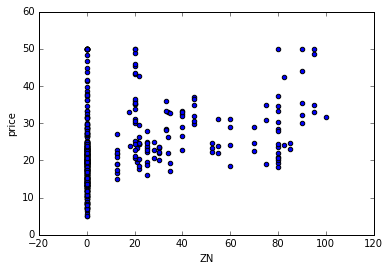

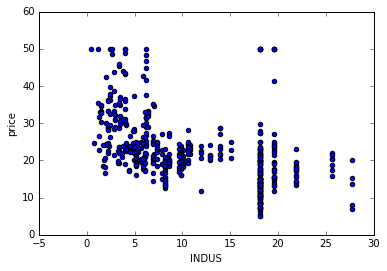

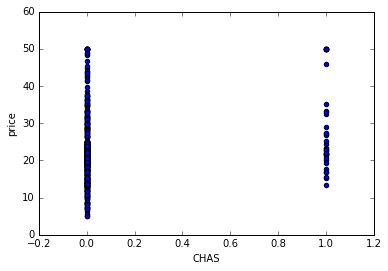

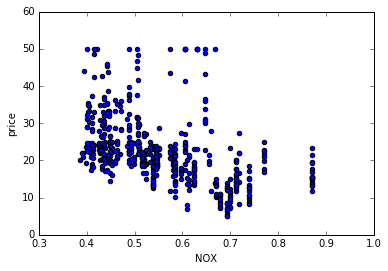

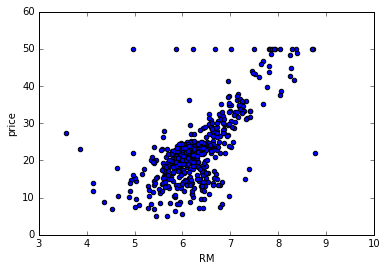

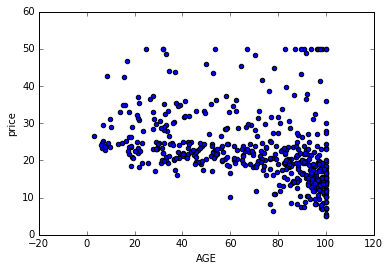

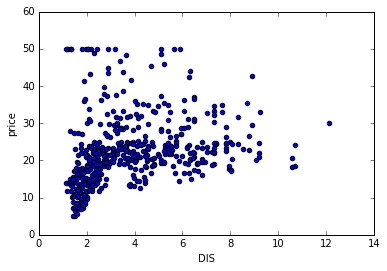

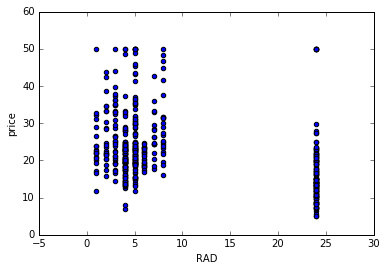

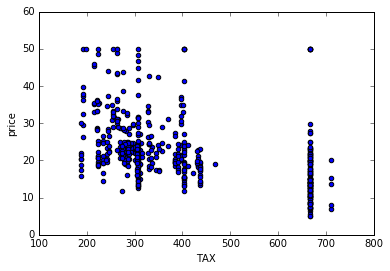

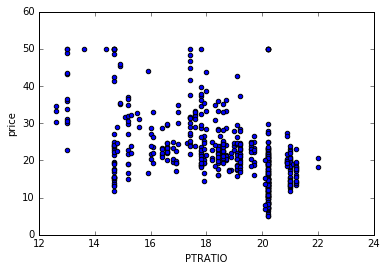

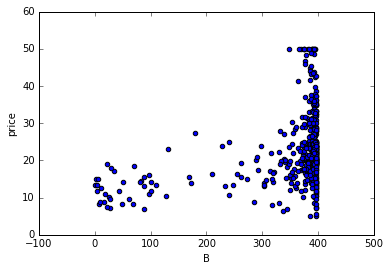

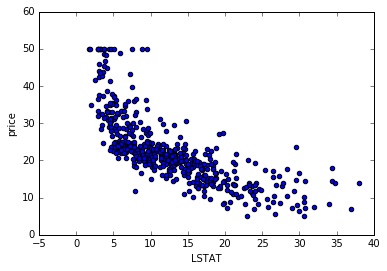

In [9]:
num_feat = 0
for feat_name in boston.feature_names :
    temp_x = get_one_features(X, num_feat)
    plot_2D_lr(temp_x, Y, x_label=feat_name, y_label='price')
    num_feat = num_feat + 1

In [10]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
predicted = regr.predict(x_test)

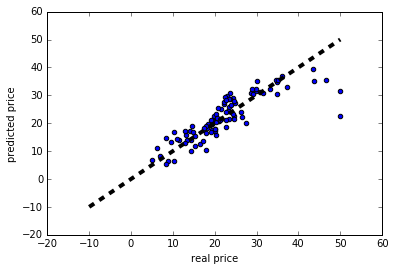

MSE - train: 21.7179594347
MSE - test: 23.1408098248


In [21]:
fig, ax = plt.subplots()
axis_max = y_test.max()
if y_test.max() < predicted.max():
    axis_max = predicted.max()

ax.plot([-10, axis_max], [-10, axis_max], 'k--', lw=4)
ax.scatter(y_test, predicted)
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')
plt.show()

print "MSE - train: %s" % mean_squared_error(regr.predict(x_train), y_train)
print "MSE - test: %s" % mean_squared_error(predicted, y_test)

In [13]:
#Restaurant 

In [14]:
example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print '# Original text is \n', '\n'.join(example_doc)

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print '# Word Vector\n', x

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [15]:
def load_json(data_path, limit=-1):
    data = list()
    
    f = open(data_path)
    for line in f:
        j = json.loads(line)
        data.append(j)
        
        if limit != -1 and len(data) > limit:
            break;
        
    return data

In [16]:
data_path = "C:\Users\sec\Desktop\dataScience\Homework_2\sample.dat"
data = load_json(data_path, 1024)
#number of data is 1024. later change to 3000 

data = pd.DataFrame(data)

In [17]:
data.tail()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,reviews,stars,state,type
1020,"{u'Wi-Fi': u'free', u'Price Range': 1, u'Outdo...",laXUQEKQ4kAO_V7lF2KvGg,"[Food, Coffee & Tea]",Charlotte,"719 Louise Ave\nPlaza Midwood\nCharlotte, NC 2...","{u'Monday': {u'close': u'20:00', u'open': u'06...",35.221505,-80.821854,Central Coffee Company,[Plaza Midwood],True,"[{u'votes': {u'funny': 2, u'useful': 4, u'cool...",4.5,NC,business
1021,{},N4ia1OkP4PIozDaD560QaQ,"[Veterinarians, Pets]",Phoenix,"4706 N 7th Ave\nPhoenix, AZ 85013","{u'Monday': {u'close': u'22:00', u'open': u'07...",33.506461,-112.082920,Alta Vista Veterinary Hospital,[],True,"[{u'votes': {u'funny': 1, u'useful': 1, u'cool...",3.5,AZ,business
1022,"{u'Wheelchair Accessible': True, u'Take-out': ...",BdC1PNadRbZPlipU074A7A,"[Breakfast & Brunch, Southern, Vegetarian, Res...",Charlotte,Stonecrest Shopping Center\n7930 Rea Rd\nCharl...,"{u'Monday': {u'close': u'16:00', u'open': u'07...",35.059113,-80.813800,Flying Biscuit Cafe,[],True,"[{u'votes': {u'funny': 0, u'useful': 2, u'cool...",3.5,NC,business
1023,"{u'Wheelchair Accessible': True, u'Take-out': ...",u6EUXOSFnjxvzLll4D21bA,"[Sushi Bars, Japanese, Restaurants]",Phoenix,"114 W Adams St\nSte C101\nPhoenix, AZ 85003","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",33.449597,-112.075508,Harumi Sushi,[],True,"[{u'votes': {u'funny': 2, u'useful': 3, u'cool...",4.5,AZ,business
1024,{u'Accepts Credit Cards': True},-sGPRV4SoS8rXdQ4z2620Q,"[Home Services, Carpet Cleaning, Local Service...",Phoenix,"111 E Dunlap Ave\nSte 167\nPhoenix, AZ 85020","{u'Monday': {u'close': u'18:00', u'open': u'08...",33.566579,-112.072315,HydroCare Services,[],True,"[{u'votes': {u'funny': 0, u'useful': 0, u'cool...",5.0,AZ,business


In [20]:

"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Yelp review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    #data['reviews']
    #data.reviews[a][b] -> a= shop, b= reviews of shop a
    #len(data.reviews[a]) -> num of reviews of shop a -> a = 0~1024

    #data.reviews[a][b]['stars'] , ['text'] 

    textList = [] # all list of bows of all restaurants
    num_reviews = len(data.reviews)    
    
    for i in range(num_reviews):
        one_textList = [] # all list of review text of one restaurant
        
        for Restaurant in data.reviews[i]:
            one_textList.append(Restaurant['text'])
        
        one_text = " ".join(one_textList)        
        textList.append(one_text)    # add texts of one Restaurant

    #vectorizer.fit(example_doc)
    vectorizer.fit(textList)

    x = vectorizer.transform(textList)
    #print '# Word Vector\n', x
    
    bow = x.toarray()

    #bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
    #print vectorizer
    #print bow
    #bow_df

    return vectorizer, bow

In [22]:
vectorizer, X = make_review_bow(data)
Y = data.stars

In [23]:
# label should be 'Int' or 'String'
Y = (Y * 10).astype('int64')

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [25]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [26]:
print "Model Accuracy: %f" % (100 * sgd.score(x_test, y_test))

Model Accuracy: 53.170732


In [27]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
print "Model Accuracy: %f" % (100 * nb.score(x_test, y_test))

Model Accuracy: 47.804878


In [29]:
result = dict()
for iter_num in range(5, 200, 10):
        print "# iter_num ", iter_num
        sgd = SGDClassifier(n_iter=iter_num)
        sgd.fit(x_train, y_train)
        
        acc = 100 * sgd.score(x_test, y_test)
        print "\tModel Accuracy: %f" % acc
        
        result[iter_num] = acc

# iter_num  5
	Model Accuracy: 34.634146
# iter_num  15
	Model Accuracy: 48.780488
# iter_num  25
	Model Accuracy: 56.585366
# iter_num  35
	Model Accuracy: 57.073171
# iter_num  45
	Model Accuracy: 43.414634
# iter_num  55
	Model Accuracy: 54.634146
# iter_num  65
	Model Accuracy: 42.926829
# iter_num  75
	Model Accuracy: 52.195122
# iter_num  85
	Model Accuracy: 54.146341
# iter_num  95
	Model Accuracy: 55.121951
# iter_num  105
	Model Accuracy: 44.878049
# iter_num  115
	Model Accuracy: 57.560976
# iter_num  125
	Model Accuracy: 57.560976
# iter_num  135
	Model Accuracy: 54.146341
# iter_num  145
	Model Accuracy: 41.951220
# iter_num  155
	Model Accuracy: 57.560976
# iter_num  165
	Model Accuracy: 56.097561
# iter_num  175
	Model Accuracy: 48.292683
# iter_num  185
	Model Accuracy: 54.634146
# iter_num  195
	Model Accuracy: 58.048780


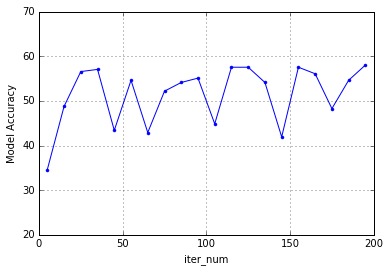

In [31]:
#result

numIter = result.keys()
numIter.sort()

accuracy = []
for i in numIter:
    accuracy.append(result[i])


plt.xlabel('iter_num')
plt.ylabel('Model Accuracy')
plt.plot(numIter, accuracy,'b.-')
plt.axis([0,200,20,70])
plt.grid(True)

plt.show()

In [ ]:
#answer for problem 8
# the Model is only decided by Training set
# and its accuracy is computed by Test set
# but the accuracy is optimistic estimate of only our test set
# so, accuracy is not generalized.
# to make the accuracy generalized,
# we should seperate datas into training set, test set, and cross validation set
# cross validation set will make the accuracy more generalized.


In [42]:
#problem 9~10

def make_review_bow_revised(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    # same to above function. make_review_bow . but add categories
    
    textList = [] # all list of bows of all restaurants
    num_reviews = len(data.reviews)    
    
    for i in range(num_reviews):
        one_textList = [] # all list of review text of one restaurant
        
        for Restaurant in data.reviews[i]:
            one_textList.append(Restaurant['text'])
        
        #add categories
        for category in data.categories[i]:
            one_textList.append(category)
        
        one_text = " ".join(one_textList)        
        textList.append(one_text)    # add texts of one Restaurant

    #vectorizer.fit(example_doc)
    vectorizer.fit(textList)

    x = vectorizer.transform(textList)
    #print '# Word Vector\n', x
    
    bow = x.toarray()

    #bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
    #print vectorizer
    #print bow
    #bow_df

    return vectorizer, bow

In [44]:
#Use new feature BOW, + categories
#and we will add vote number of: funny, useful, cool, features
#new algorithm for newX, Y is same to newY
vectorizer, newX = make_review_bow_revised(data)
newY = Y

In [45]:
numData = len(data.reviews) # number of reviews
#add feature votes funny, useful, cool
#each reviews has just sum of them.
newFeatures = []
for rev in range(numData):
    sumFun = 0
    sumUse = 0
    sumCoo = 0
    lenth = 0.0
    star = data.stars[rev]
    for i in data.reviews[rev]:
        fun = i['votes']['funny']
        use = i['votes']['useful']
        coo = i['votes']['cool']
        if fun + use + coo != 0:
            sumFun = sumFun + fun
            sumUse = sumUse + use
            sumCoo = sumCoo + coo
            lenth = lenth + 1
    sumFun = int(sumFun/lenth*100)
    sumUse = int(sumUse/lenth*100)
    sumCoo = int(sumCoo/lenth*100)
    newFeatures.append({'funny':sumFun, 'useful':sumUse, 'cool':sumCoo, 'lenth':lenth, 'stars':star})

#for i in range(numData):
#    print newFeatures[i]

    

In [50]:
#add new features funny, useful, cool
newFeatureArray = np.array([[newFeatures[0]['funny'],newFeatures[0]['useful'],newFeatures[0]['cool']]])
for i in range(numData-1):
    tempArray = np.array([[newFeatures[i+1]['funny'],newFeatures[i+1]['useful'],newFeatures[i+1]['cool']]])
    newFeatureArray = np.concatenate((newFeatureArray, tempArray), axis=0)
#print newFeatureArray

#concatenate with newX data and new Feature data
newX = np.concatenate((newX, newFeatureArray), axis=1)
print newX

[[  6   0   0 ...,  65 222 102]
 [  0   0   0 ..., 107 224 137]
 [  6   0   0 ..., 200 364 134]
 ..., 
 [  2   0   0 ...,  50 126  76]
 [  5   0   0 ...,  43 157  88]
 [  4   0   0 ...,  12 121  15]]


In [51]:
#Seperate newX, newY to train, cross-valid, and test data
#newx_train, newx_test, newy_train, newy_test = train_test_split(newX,newY, test_size=0.2)
newx_train, newx_sub, newy_train, newy_sub = train_test_split(newX,newY, test_size=0.4)
newx_crossval, newx_test, newy_crossval, newy_test = train_test_split(newx_sub,newy_sub, test_size=0.5)

#we have train, crossval, test datas .

In [52]:
newSgd = SGDClassifier()
newSgd.fit(newx_train, newy_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [53]:
print "Model Accuracy: %f" % (100 * newSgd.score(newx_crossval, newy_crossval))

Model Accuracy: 34.146341


In [54]:
nb = MultinomialNB()
nb.fit(newx_train, newy_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
print "Model Accuracy: %f" % (100 * nb.score(newx_crossval, newy_crossval))

Model Accuracy: 43.414634


In [56]:
newResult = dict()
for iter_num in range(5, 200, 10):
        print "# iter_num ", iter_num
        newSgd = SGDClassifier(n_iter=iter_num)
        newSgd.fit(newx_train, newy_train)
        
        acc = 100 * newSgd.score(newx_crossval, newy_crossval)
        print "\tModel Accuracy: %f" % acc
        
        newResult[iter_num] = acc

# iter_num  5
	Model Accuracy: 19.024390
# iter_num  15
	Model Accuracy: 48.780488
# iter_num  25
	Model Accuracy: 45.853659
# iter_num  35
	Model Accuracy: 46.829268
# iter_num  45
	Model Accuracy: 46.829268
# iter_num  55
	Model Accuracy: 41.463415
# iter_num  65
	Model Accuracy: 40.000000
# iter_num  75
	Model Accuracy: 48.780488
# iter_num  85
	Model Accuracy: 49.268293
# iter_num  95
	Model Accuracy: 39.512195
# iter_num  105
	Model Accuracy: 52.195122
# iter_num  115
	Model Accuracy: 48.780488
# iter_num  125
	Model Accuracy: 48.292683
# iter_num  135
	Model Accuracy: 49.756098
# iter_num  145
	Model Accuracy: 50.243902
# iter_num  155
	Model Accuracy: 50.731707
# iter_num  165
	Model Accuracy: 51.219512
# iter_num  175
	Model Accuracy: 49.756098
# iter_num  185
	Model Accuracy: 49.268293
# iter_num  195
	Model Accuracy: 52.195122


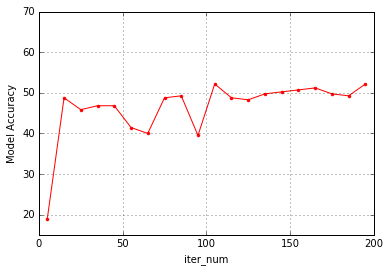

In [67]:
#problem 9~10 : result

newNumIter = newResult.keys()
newNumIter.sort()

newAccuracy = []
for i in newNumIter:
    newAccuracy.append(newResult[i])


plt.xlabel('iter_num')
plt.ylabel('Model Accuracy')
plt.plot(newNumIter, newAccuracy,'r.-')
plt.axis([0,200,15,70])
plt.grid(True)

plt.show()

In [68]:
#best for Cross validation iter_num = 105
def find_best_key(result):
    for bestKey in result.keys():
        if(result[bestKey] == max(result.values())):
            return bestKey

best_iter_num = find_best_key(newResult)

print "# best iter_num ", best_iter_num
finalSgd = SGDClassifier(n_iter=best_iter_num)
finalSgd.fit(newx_train, newy_train)
        
acc = 100 * newSgd.score(newx_test, newy_test)
print "\tFinal Model Accuracy: %f" % acc
        

# best iter_num  105
	Final Model Accuracy: 53.658537
